<h1>يهدف هذا الدفتر الى تحليل الناجين من حادثة سفينة تايتنك</h1>
<a href="https://www.kaggle.com/datasets/yasserh/titanic-dataset">المصدر</a>

In [ ]:
!pip install unicodecsv

  Preparing metadata (setup.py) ... done
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=6f4e8351e8c66582fa5ea65342237f549ec785e690a2d7f5353e070dd6fb73ce
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
Successfully built unicodecsv


**تحميل المكتبات**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodecsv as csv

In [ ]:
file=pd.read_csv('/content/titanic_data.csv')

In [ ]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**ملء القيم المفقودة**

In [ ]:
file['Survived'].fillna(1,inplace=True)
file['Pclass'].fillna(1,inplace=True)
file['Sex'].fillna('female',inplace=True)
file['Age'].fillna(20,inplace=True)
file['SibSp'].fillna(0,inplace=True)
file['Parch'].fillna(3,inplace=True)
file['Ticket'].fillna(0,inplace=True)
file['Fare'].fillna(10.0,inplace=True)
file['Cabin'].fillna('C10',inplace=True)
file['Embarked'].fillna('Q',inplace=True)



---



**نستخراج عدد الناجين وتقسيم الإناث والذكور ومن ثم نرسمهم بيانياً**

In [ ]:
number_of_survive=len(file.loc[file['Survived']==1])

In [ ]:
female_survived=len(file.loc[(file['Survived']==1) & (file['Sex']=='female')])

In [ ]:
male_survived=number_of_survive-female_survived

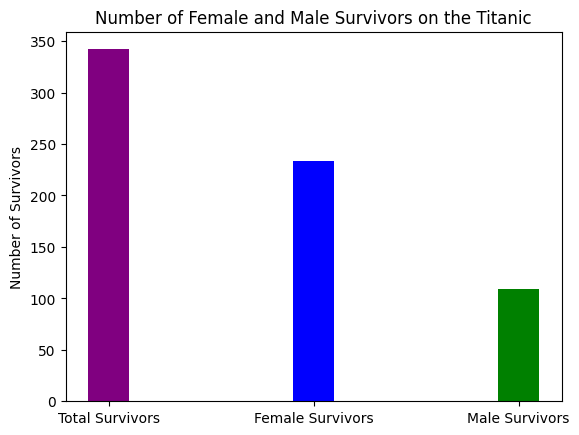

In [ ]:
categories = ['Total Survivors','Female Survivors', 'Male Survivors']
counts = [number_of_survive,female_survived, male_survived]
plt.bar(categories, counts, color=['purple','blue', 'green'],width=0.2)
plt.ylabel('Number of Survivors')
plt.title('Number of Female and Male Survivors on the Titanic')
plt.show()

**متوسط ​​عمر إجمالي الناجين**

In [ ]:
Avarage_age_of_survivors=(file.loc[file['Survived']==1])['Age'].mean()
round(Avarage_age_of_survivors)

27



---



**الآن، سوف استبدل اسم كل ميناء صعود باسم الدولة لحساب عدد الركاب الذين يزورون الدولة فقط للصعود على متن السفينة تيتانيك (أعلم أن بعضهم مواطنون لكنني افترضت أنهم زوار)**
<ul>
<li>ireland = 'queenstown'</li>
<li>england = 'southhampton'</li>
<li>france = 'cherbourg'</li>

In [ ]:
file['Embarked'].replace('Q','Ireland',inplace=True)

In [ ]:
file['Embarked'].replace('S','England',inplace=True)

In [ ]:
file['Embarked'].replace('C','France',inplace=True)

In [ ]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C10,England
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C10,England
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C10,England


In [ ]:
tot_num_irland=len(file.loc[file['Embarked']=='Ireland'])
tot_num_england=len(file.loc[file['Embarked']=='England'])
tot_num_france=len(file.loc[file['Embarked']=='France'])


In [ ]:
num_surviv_irland=len(file.loc[(file['Embarked']=='Ireland')&(file['Survived']==1)])
num_surviv_england=len(file.loc[(file['Embarked']=='England')&(file['Survived']==1)])
num_surviv_france=len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)])

In [ ]:
female_irland_survivors = len(file.loc[(file['Embarked']=='Ireland')&(file['Survived']==1)&(file['Sex']=='female')])
female_england_survivors = len(file.loc[(file['Embarked']=='England')&(file['Survived']==1)&(file['Sex']=='female')])
female_france_survivors = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='female')])

male_irland_survivors = num_surviv_irland - female_irland_survivors
male_england_survivors = num_surviv_england - female_england_survivors
male_france_survivors = num_surviv_france - female_france_survivors

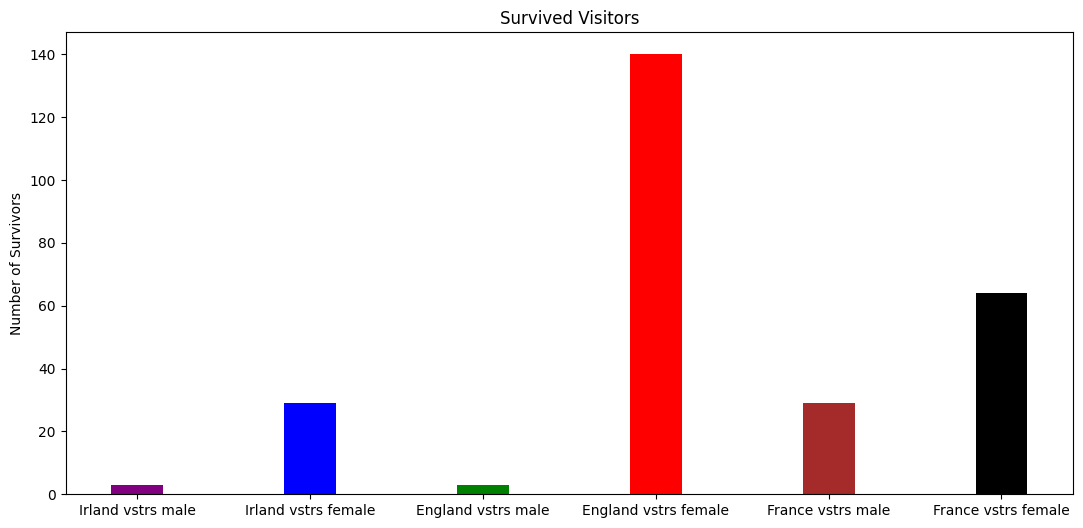

In [ ]:
categories = ['Irland vstrs male','Irland vstrs female', 'England vstrs male', 'England vstrs female','France vstrs male','France vstrs female']
counts = [male_irland_survivors , female_irland_survivors, male_irland_survivors, female_england_survivors, male_france_survivors, female_france_survivors]
plt.figure(figsize=(13, 6))
plt.bar(categories, counts, color=['purple','blue','green','red','brown','black'],width=0.3)
plt.ylabel('Number of Survivors')
plt.title('Survived Visitors')
plt.show()



---



**نلاحظ زوار فرنسا لديهم العديد من الناجين من الإناث والذكور مقارنة بزوار الدول الأخرى، لذلك سنرى أعمار الناجين التي تم تصنيفها إلى (طفل، بالغ، كبير السن)**

In [ ]:
female_child_france_survivor = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='female')&(file['Age']<=14)])
male_child_france_survivor = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='male')&(file['Age']<=14)])

female_grown_france_survivor = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='female')&(file['Age']>=15) & (file['Age']<=45)])
male_grown_france_survivor = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='male')&(file['Age']>=15) & (file['Age']<=45)])

female_elder_france_survivor = len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='female')&(file['Age']>=46)])
male_elder_france_survivor =  len(file.loc[(file['Embarked']=='France')&(file['Survived']==1)&(file['Sex']=='female')&(file['Age']>=46)])

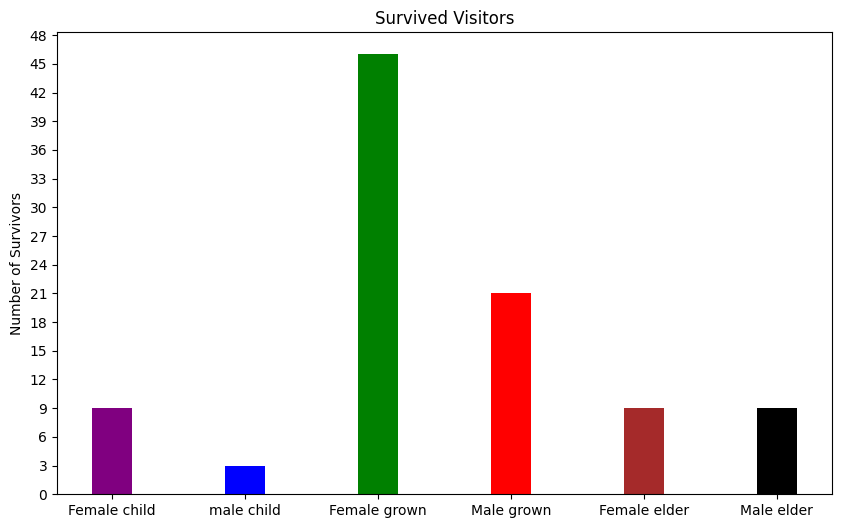

In [ ]:
categories = ['Female child', 'male child', 'Female grown', 'Male grown', 'Female elder', 'Male elder']
counts = [female_child_france_survivor , male_child_france_survivor, female_grown_france_survivor, male_grown_france_survivor, female_elder_france_survivor, male_elder_france_survivor]
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['purple','blue','green','red','brown','black'],width=0.3)

ytick_positions = range(0,50,3)  # Specify the positions of tick marks
ytick_labels = range(0,50,3)  # Specify the labels for tick marks

# Apply custom y-axis ticks
plt.yticks(ytick_positions, ytick_labels)

plt.ylabel('Number of Survivors')
plt.title('Survived Visitors')
plt.show()